# Google Landmark Detection 

## References

- Weyand, T., Araujo, A., Cao, B., & Sim, J. (2020).  
  *Google Landmarks Dataset v2 – A Large-Scale Benchmark for Instance-Level Recognition and Retrieval.*  
  In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR).  

- Tolias, G., Jégou, H., & Vedaldi, A. (2019).  
  *Detect-to-Retrieve: Efficient Regional Aggregation for Image Search.*  
  In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR).  


## 1. Importing Libraries 

In [15]:
# Importing Libs
import os 
import cv2 
import keras 
import random 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 

## 2. Loading Dataset

In [16]:
df = pd.read_csv("../train.csv")

In [17]:
# dataset preview 
df.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [18]:
# dataset preview 
df.tail()

,id,landmark_id
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092
1580469,d9e338c530dca106,203092


In [19]:
# dataset info : including memory info  
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580470 entries, 0 to 1580469
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1580470 non-null  object
 1   landmark_id  1580470 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 110.0 MB


In [20]:
# Taking 30k samples from the dataset
samples = 20000
df  = df.iloc[: samples , :]
n_unique_classes = len(df["landmark_id"].unique()) #  unique number of data 
n_data  = len(df) # no.of data 

In [21]:
n_unique_classes

1020

In [22]:
n_data

20000

In [23]:
data = pd.DataFrame(df["landmark_id"].value_counts()).reset_index()

# Starting
data.head()

,landmark_id,count
0,1924,944
1,27,504
2,454,254
3,1346,244
4,1127,201


In [24]:
# Ending
data.tail()

,landmark_id,count
1015,1658,2
1016,1444,2
1017,1662,2
1018,461,2
1019,2394,2


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
landmark_id,1020.0,1301.104902,740.092621,1.0,684.5,1282.0,1955.0,2586.0
count,1020.0,19.607843,41.652532,2.0,5.0,9.0,21.0,944.0


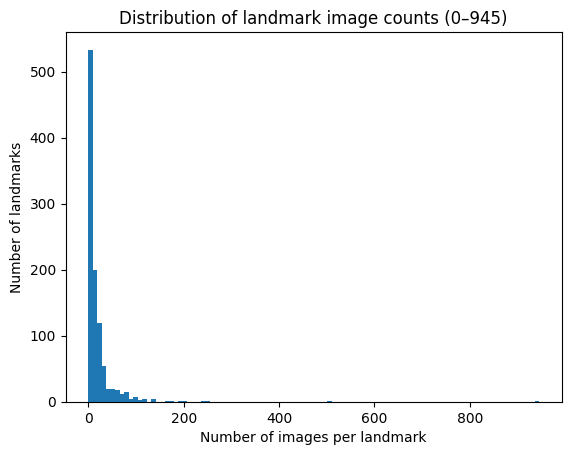

In [39]:
# Visual distribution of sample
plt.hist(data["count"] , 100  , range = (0 , 945))
plt.xlabel("Number of images per landmark")
plt.ylabel("Number of landmarks")
plt.title("Distribution of landmark image counts (0–945)")
plt.show()

In [42]:
data["count"].between(0 , 5).sum()

np.int64(322)

In [43]:
data["count"].between(5 , 10).sum()

np.int64(342)

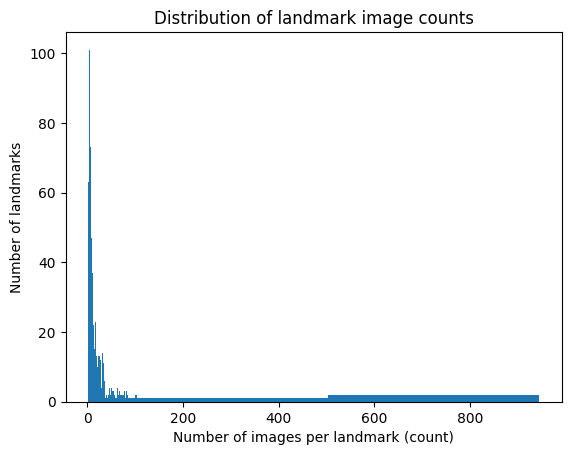

In [54]:
plt.hist(data["count"], bins=np.sort(data["count"].unique()))
plt.xlabel("Number of images per landmark (count)")
plt.ylabel("Number of landmarks")
plt.title("Distribution of landmark image counts")
plt.show()